# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [4]:
#Import all libraries you may need in this cell:

import pandas as pd

import plotly.graph_objects as go 

import matplotlib.pyplot as plt


## 1 - Finding the COVID-19 numbers per state.

In [5]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

# list of state abbreviations in alphabetical order 
stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
def plot_cases(state):
  user_state = df.loc[df['state'] == state]
  new_df = user_state.loc[:, ["date", "cases"]]
  fig = plt.figure()

  ax = fig.add_axes([0, 0, 2, 2])

  dates = new_df["date"] # x-axis 
  cases = new_df["cases"] # y-axis 

  plt.plot(dates, cases) # line graph 
  plt.bar(dates, cases) # bar graph 

  plt.xlabel("Dates")
  plt.ylabel("Cases")
  plt.title("# of Cases Over Time ")

  plt.show()



Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [8]:
def plot_deaths(state):
  user_state = df.loc[df['state'] == state]
  new_df = user_state.loc[:, ["date", "deaths"]]
  fig = plt.figure()

  ax = fig.add_axes([0, 0, 2, 2])

  dates = new_df["date"] # x-axis 
  cases = new_df["deaths"] # y-axis 

  plt.plot(dates, cases) # line graph 
  plt.bar(dates, cases) # bar graph 

  plt.xlabel("Dates")
  plt.ylabel("Deaths")
  plt.title("# of Deaths Over Time ")

  plt.show()


Call the functions on your assigned state to visualize the data.

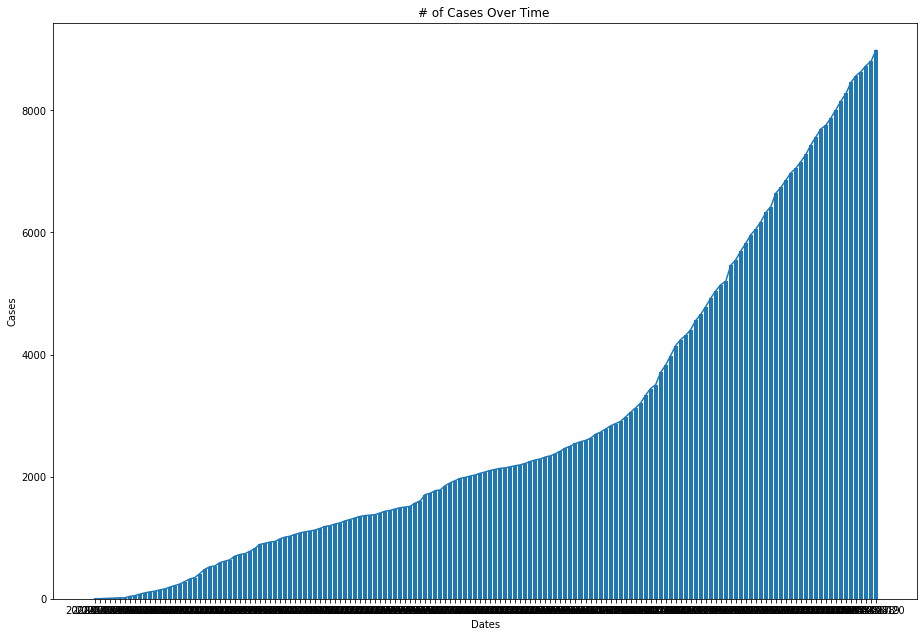

In [9]:
plot_cases("West Virginia")

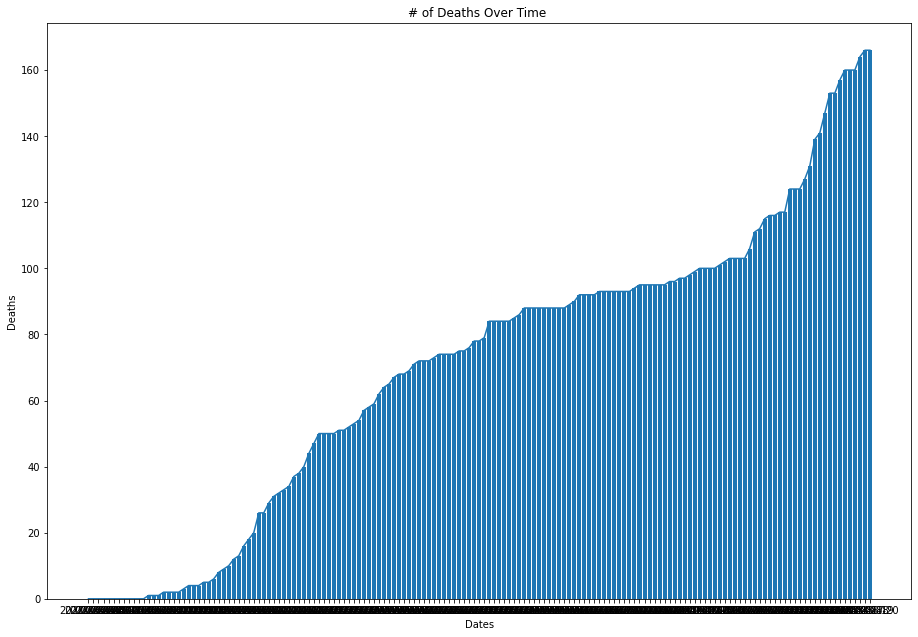

In [10]:
plot_deaths("West Virginia")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [11]:
#Dataframe Formatter

def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True)

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)

    return df_formatted

In [12]:
#Call the function and assign what it returns to the dataframe variables you will be using.

deaths_df = dfFormatter(df, "deaths")

deaths_df["state abbreviations"] = stateAbbreviationList

deaths_df.head()

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,state abbreviations
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1124.0,1164.0,1211.0,1230.0,1265.0,1286.0,1287.0,1291.0,1303.0,1364.0,1397.0,1438.0,1456.0,1473.0,1491.0,1491.0,1538.0,1565.0,1580.0,1603.0,1627.0,1633.0,1666.0,1695.0,1714.0,1735.0,1755.0,1768.0,1797.0,1847.0,1882.0,1890.0,1893.0,1896.0,1898.0,1925.0,1936.0,1944.0,1974.0,AL
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,18.0,18.0,19.0,20.0,20.0,21.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,24.0,24.0,24.0,24.0,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0,AK
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2250.0,2341.0,2442.0,2506.0,2597.0,2733.0,2768.0,2795.0,2918.0,2976.0,3067.0,3156.0,3288.0,3313.0,3320.0,3424.0,3470.0,3628.0,3695.0,3753.0,3769.0,3785.0,3850.0,3933.0,4005.0,4085.0,4140.0,4152.0,4157.0,4205.0,4348.0,4385.0,4426.0,4497.0,4509.0,4509.0,4535.0,4643.0,4688.0,AZ
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,323.0,331.0,335.0,341.0,353.0,357.0,357.0,363.0,374.0,380.0,386.0,394.0,399.0,401.0,408.0,428.0,434.0,442.0,453.0,458.0,464.0,475.0,490.0,508.0,515.0,521.0,535.0,544.0,555.0,566.0,573.0,582.0,587.0,600.0,599.0,603.0,619.0,631.0,641.0,AR
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7086.0,7227.0,7368.0,7490.0,7607.0,7697.0,7710.0,7764.0,7883.0,8038.0,8190.0,8325.0,8428.0,8451.0,8544.0,8716.0,8884.0,9009.0,9222.0,9365.0,9399.0,9500.0,9696.0,9866.0,10014.0,10197.0,10299.0,10365.0,10460.0,10654.0,10808.0,10995.0,11146.0,11229.0,11245.0,11334.0,11523.0,11686.0,11801.0,CA


In [13]:
def deaths_map (date):

  
#Use pandas to restructure our data

  colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
          "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
          "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E" ]


  fig = go.Figure(data = go.Choropleth( # fig 
    locationmode = "USA-states", # allows u to hover over the map and see the name of the countries
    locations = deaths_df["state abbreviations"], # import country column from new_df and assigns it to var, locations
    z = deaths_df[date], # sets the color values using the total recoveries column  
    colorscale = colors,  # gives it the range of colors from the list colors (above)
    reversescale = True, 
    autocolorscale = False, 
    colorbar_title= "Number of Covid Deaths per State"

  ))

  fig.update_layout(
      title_text = "Number of Covid Deaths in the US", 
      geo = dict(
        showcoastlines = True,
        scope = "usa" 
        )
    )
  




  map = fig.show()


  return(map)



deaths_map("2020-05-27")

## 2 - Analyzing Its Impact on the United States

Group 4 -

COVID-19 has a greater impact on some people more than others depending on specific factors. 

Using the following dataset from cdc.gov(https://data.cdc.gov/widgets/9bhg-hcku), create a function that plots bar graphs that analyze the # of deaths based on age demographics and gender demographics in each state.

In [14]:
df = pd.read_csv("/content/drive/My Drive/amnh unit 6/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df.head()
df.tail()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
1411,08/19/2020,02/01/2020,08/15/2020,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1412,08/19/2020,02/01/2020,08/15/2020,Puerto Rico,Female,85 years and over,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1413,08/19/2020,02/01/2020,08/15/2020,Puerto Rico,Female,All ages,14.0,493.0,47.0,NaN,NaN,59.0,One or more data cells have counts between 1–9...
1414,08/19/2020,02/01/2020,08/15/2020,Puerto Rico,Unknown,All ages,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1–9...
1415,08/19/2020,02/01/2020,08/15/2020,Puerto Rico Total,All,All ages,40.0,1579.0,123.0,17.0,NaN,152.0,One or more data cells have counts between 1–9...


In [60]:

def covid_graph_female(state): 

# first isolate state data

  user_state = df.loc[df['State'] == state]
  new_df = user_state.loc[:, ["Total Deaths"]]
  return new_df 

covid_graph_female("Puerto Rico")


,Total Deaths
1390,31.0
1391,NaN
1392,NaN
1393,99.0
1394,190.0
1395,256.0
1396,497.0
1397,0.0
1398,0.0
1399,0.0


In [70]:
age = df["Age group"]
sex = df["Sex"]

def covid_graph_female(state): 

# first isolate state data

    user_state = df.loc[df['State'] == state]
    new_df = user_state.loc[:, ["Total Deaths"]]


#then isolate data based on gender 

    user_type = new_df.loc[df["Sex"] == "Female"]
    new_df = user_type.loc[:, ["date", "deaths"]]
      
    fig = plt.figure()

    ax = fig.add_axes([0, 0, 2, 2])

    dates = new_df["date"] # x-axis 
    cases = new_df["deaths"] # y-axis 

    plt.plot(dates, cases) # line graph 
    plt.bar(dates, cases) # bar graph 

    plt.xlabel("Dates")
    plt.ylabel("Deaths")
    plt.title("# of Deaths Over Time")

    plt.show("West Virginia")

    return(fig)


covid_graph_female()



TypeError: ignored

In [ ]:
def covid_graph_male(age, state):

# isolate which state 


#isolate data based on gender 
      user_type = df.loc[df["Sex"] == "Male"]
      new_df = user_type.loc[:, ["date", "deaths"]]
      fig = plt.figure()

      ax = fig.add_axes([0, 0, 2, 2])

      dates = new_df["date"] # x-axis 
      cases = new_df["deaths"] # y-axis 

      plt.plot(dates, cases) # line graph 
      plt.bar(dates, cases) # bar graph 

      plt.xlabel("Dates")
      plt.ylabel("Deaths")
      plt.title("# of Deaths Over Time ")



      plt.show()

    return(fig)


In [68]:
covid_graph(df["Sex"])

ValueError: ignored

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..